In [16]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('./Csv Files/SWAGAT_INPUT_income_dataset_balanced.csv')


## Split as train and test

In [17]:
# Define the target variable
target_variable = 'Risk_Flag'
# Separate features (X) and target variable (y)
X = data.drop(columns=[target_variable])  # Features
y = data[target_variable]                 # Target

# Split the dataset into training (30,000 samples) and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Concatenate X_train and y_train along columns to create the training dataset
train_data = pd.concat([X_train, y_train], axis=1)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Save the training dataset (features + target) and test dataset (features) to CSV files
train_data.to_csv('./Csv Files/Train_Data.csv', index=False)
X_test.to_csv('./Csv Files/Test_Data.csv', index=False)

# Save the target variable for the test dataset to a CSV file
y_test.to_csv('./Csv Files/Test_Target.csv', index=False, header=True)


X_train shape: (31413, 12)
X_test shape: (3491, 12)
y_train shape: (31413,)
y_test shape: (3491,)


## Training data

In [18]:
data = pd.read_csv('./Csv Files/Train_Data.csv');
print("is data clean :- " , data.notnull().values.all())  # data is clean
#print("risk :- \n",data["Risk_Flag"].value_counts())
input_data1 = data.copy()
input_data1.drop(['CITY','STATE','Risk_Flag'],axis = 1 ,inplace = True)

# Married 

input_data1['Married/Single'] = input_data1['Married/Single'].apply(lambda x : 1 if  x == 'married' else 0 )
print(input_data1['Married/Single'].value_counts())

# House ownership

#print(input_data1['House_Ownership'].value_counts())
ownership_mapping = {'rented': 0, 'norent_noown': 1, 'owned': 2}
input_data1['House_Ownership'] = input_data1['House_Ownership'].map(ownership_mapping)
print(input_data1['House_Ownership'].value_counts())

# car ownership 
input_data1['Car_Ownership'].value_counts()
input_data1['Car_Ownership'] = input_data1['Car_Ownership'].apply(lambda x : 1 if  x == 'yes' else 0 )
print(input_data1['Car_Ownership'].value_counts())


# Profession 

input_data1['Profession'] = input_data1['Profession'].str.replace('_', ' ')

print("number of professions :- ",input_data1['Profession'].nunique())

average_income_by_profession = input_data1.groupby('Profession')['Income'].mean()
# Format the numbers without scientific notation and with commas as thousand separators
average_income_by_profession = average_income_by_profession.apply(lambda x: "{:,.2f}".format(x))

#print("average salary of each profession :-\n ",average_income_by_profession)

# Create a mapping for encoding based on average income
profession_encoding = dict(zip(average_income_by_profession.sort_values().index, range(input_data1['Profession'].nunique())))
#print(profession_encoding)

# Save the DataFrame to a CSV file this will be used to encoding test data based on training data
df = pd.DataFrame(list(profession_encoding.items()), columns=['Profession', 'Rank'])
df.to_csv('./Csv Files/profession_rank.csv', index=False)


# Apply the mapping to create a new column 'Profession_Encoded'
input_data1['Profession_Encoded'] = input_data1['Profession'].map(profession_encoding)
#print(input_data1['Profession_Encoded'].value_counts() )


input_data1_final = input_data1.copy()
input_data1_final.drop(['Profession'],axis = 1,inplace = True)
#print(input_data1_final)
output_data1 = data.filter(['Id','Risk_Flag'])
#print(output_data1)


# Remove id from both
train_X = input_data1_final.copy()
train_X.drop(['Id'],axis = 1 , inplace = True )
train_Y = output_data1.copy()
train_Y.drop(['Id'],axis = 1 , inplace = True)
#print(train_X.head(10))
#print(train_Y.head(10))

# Load test data
train_X.to_csv('./Csv Files/Train_X.csv',index=False)
train_Y.to_csv('./Csv Files/Train_Y.csv', index=False)

# make array of target variable
Y_train = train_Y['Risk_Flag'].values

is data clean :-  True
0    28318
1     3095
Name: Married/Single, dtype: int64
0    28933
2     1599
1      881
Name: House_Ownership, dtype: int64
0    21933
1     9480
Name: Car_Ownership, dtype: int64
number of professions :-  51


## Testing data

In [19]:

data = pd.read_csv('./Csv Files/Test_Data.csv');

print("is data clean :- " , data.notnull().values.all())  # data is clean

input_data1 = data.copy()
input_data1.drop(['CITY','STATE'],axis = 1 ,inplace = True)


input_data1['Married/Single'] = input_data1['Married/Single'].apply(lambda x : 1 if  x == 'married' else 0 )
print(input_data1['Married/Single'].value_counts())

#print(input_data1['House_Ownership'].value_counts())
ownership_mapping = {'rented': 0, 'norent_noown': 1, 'owned': 2}
input_data1['House_Ownership'] = input_data1['House_Ownership'].map(ownership_mapping)
print(input_data1['House_Ownership'].value_counts())

#print(input_data1['Car_Ownership'].value_counts())
input_data1['Car_Ownership'] = input_data1['Car_Ownership'].apply(lambda x : 1 if  x == 'yes' else 0 )
print(input_data1['Car_Ownership'].value_counts())

#print(input_data1['Profession'].value_counts())
print("number of professions :- ",input_data1['Profession'].nunique())
profession_encoding = {}

# Read the CSV file and populate the dictionary
with open('./Csv Files/profession_rank.csv', 'r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        profession_encoding[row['Profession']] = int(row['Rank'])

        
# Now profession_encoding dictionary contains profession and its rank mappings
#print(profession_encoding)  # Example usage

# Apply the mapping to create a new column 'Profession_Encoded'
input_data1['Profession_Encoded'] = input_data1['Profession'].map(profession_encoding)
#print(input_data1['Profession_Encoded'].value_counts() )


# features
input_data1_final = input_data1.copy()
input_data1_final.drop(['Profession'],axis = 1,inplace = True)
#print(input_data1_final)

# target variable
output_data1 = pd.read_csv('./Csv Files/Test_Target.csv')
print("Distribution of target variable:- \n",output_data1["Risk_Flag"].value_counts())
# change name of column according to training data
output_data1.rename(columns = {'id' : 'Id' , 'risk_flag':'Risk_Flag' },inplace = True)

# drop id column
test_X = input_data1_final.copy()
test_X.drop(['Id'],axis = 1 , inplace = True)
test_Y = output_data1.copy()
#test_Y.drop(['Id'],axis = 1 , inplace = True)
#print(test_X.shape)
#print(test_Y.shape)

# save to a csv , this is our test data
test_X.to_csv('./Csv Files/test_x.csv',sep=',' , index =False , encoding = 'utf-8')
test_Y.to_csv('./Csv Files/test_y.csv', sep=',', index=False, encoding='utf-8')

# Load test data
x_test = pd.read_csv('./Csv Files/test_x.csv')
y_test = pd.read_csv('./Csv Files/test_y.csv')

# check if values are pure
print("Is input pure :- ",x_test.notnull().values.all())

is data clean :-  True
0    3147
1     344
Name: Married/Single, dtype: int64
0    3235
2     150
1     106
Name: House_Ownership, dtype: int64
0    2439
1    1052
Name: Car_Ownership, dtype: int64
number of professions :-  51
Distribution of target variable:- 
 0    1753
1    1738
Name: Risk_Flag, dtype: int64
Is input pure :-  True


## Running model

Accuracy :-  69.7221426525351 %
F1-score: 0.7119
Confusion Matrix:
[[1128  625]
 [ 432 1306]]


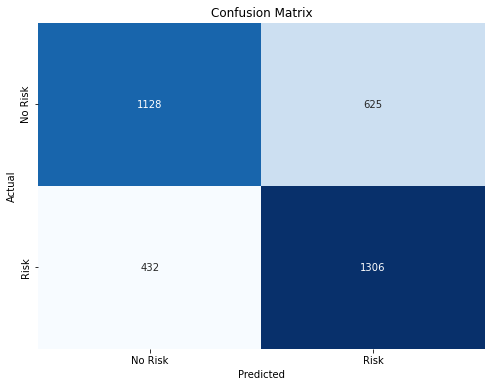

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model = RandomForestClassifier(n_estimators = 100 ,max_samples = 1.0, criterion = 'gini', max_depth = 3,min_samples_split = 10 , min_samples_leaf = 1 )

model.fit(train_X,Y_train)

x_test.head(10)
test_y = y_test['Risk_Flag'].values

print("Accuracy :- ",model.score(x_test,test_y)*100 , "%")
# Calculate and print F1-score
predictions = model.predict(x_test)
f1score = f1_score(test_y, predictions)
print(f"F1-score: {f1score:.4f}")
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(test_y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()